## 01 Class exercise slicing dataframe
Use this data:
```python
data = np.array([['','Col1','Col2','col3'],
                ['Row1',1,2,3],
                ['Row2',4,5,6],
                ['Row3',7,8,9]])
```
1. Create a DataFrame (wrap the data above in a pandas DataFrame in a way that printing the dataframe and its index and column attributes gives this result)  
`pd.DataFrame(data=data[1:4,1:4], columns=data[0,1:4], index=data[1:4,0])`  

``` 
     Col1 Col2 col3  
Row1    1    2    3
Row2    4    5    6
Row3    7    8    9

Index(['Row1', 'Row2', 'Row3'], dtype='object')
Index(['Col1', 'Col2', 'col3'], dtype='object')
```

2. Make slices of data:
   1. second column using column name
   2. third column using column index (.iloc[])
   3. slice element at third row of second column (use .iloc())

In [36]:
import numpy as np
data = np.array([['','Col1','Col2','col3'],
                ['Row1',1,2,3],
                ['Row2',4,5,6],
                ['Row3',7,8,9]])

In [37]:
import pandas as pd
pd_data = pd.DataFrame(data=data[1:4,1:4], columns=data[0,1:4], index=data[1:4,0])

In [38]:
pd_data['Col2']

Row1    2
Row2    5
Row3    8
Name: Col2, dtype: object

In [39]:
pd_data.iloc[:,2]

Row1    3
Row2    6
Row3    9
Name: col3, dtype: object

In [40]:
pd_data.iloc[2,1]

'8'

## 02 Exercise Pandas Data Series
The CO2 Emission data set above is not updated since 2014
1. Create a Pandas Series with emission data from 2014 for each country or region
2. Find the 10 Countries/Regions with the highest emissions in 2014 and show emission numbers (reverse sorted)
3. Remove if you can those rows that are not countries (regions and aggregated groups) (hint:  [ISO 3166, Alpha-3 country codes](https://www.iban.com/country-codes), a csv file can be found here: `/data/country_codes.csv`)
    - Find the 10 countries with highest emissions in 2014
4. Plot the emissions of China and USA over time respectively

In [41]:
data = pd.read_csv('../data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1345584.csv', skiprows=4)
columns_names = data.columns
countries = data['Country Name']

data_2014 = data[['Country Name','Country Code','2014']]

data_2014.sort_values('2014', ascending=False)[:20]



,Country Name,Country Code,2014
101,IDA & IBRD total,IBT,2.155943e+07
138,Low & middle income,LMY,2.110046e+07
154,Middle income,MIC,2.091510e+07
100,IBRD only,IBD,2.073197e+07
247,Upper middle income,UMC,1.693238e+07
140,Late-demographic dividend,LTE,1.509443e+07
61,East Asia & Pacific,EAS,1.413107e+07
93,High income,HIC,1.298539e+07
179,OECD members,OED,1.220186e+07
59,East Asia & Pacific (excluding high income),EAP,1.155527e+07


## 03 Exercise pandas dataframe
1. Using the dataframe in the above cell find:
    1. Mean, Min, Max values for all 4 columns
    2. The 2 dates with the largest and smallest sum (by column)
    3. All dates where both A's and B's are positive

In [8]:
dates = pd.date_range('20200602', periods=6) # create 6 dates from september 2nd, 2020.
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) # use np.random.randn to generate a dataframe of 6 by 4 random numbers
df

,A,B,C,D
2020-06-02,-0.769590,0.599612,-2.713272,1.038351
2020-06-03,0.037268,-0.175769,-0.464235,0.117410
2020-06-04,-1.627941,0.933635,0.162107,-0.971522
2020-06-05,0.816773,-1.580811,1.163502,-0.238208
2020-06-06,1.658172,-0.062535,0.792037,0.408631
2020-06-07,-0.898097,0.213141,0.249274,0.204776


In [42]:
df.describe().loc[['mean','min','max']]

,A,B,C,D,Sum
mean,-0.130569,-0.012121,-0.135098,0.093240,-0.184548
min,-1.627941,-1.580811,-2.713272,-0.971522,-1.844899
max,1.658172,0.933635,1.163502,1.038351,2.796305


In [43]:
df.idxmax()

A     2020-06-06
B     2020-06-04
C     2020-06-05
D     2020-06-02
Sum   2020-06-06
dtype: datetime64[ns]

In [44]:
df["Sum"] = df.sum(axis=1)

In [45]:
df.min().loc['Sum']

-3.6897973220425038

In [46]:
df[df['Sum'] == df.min().loc['Sum']]

,A,B,C,D,Sum
2020-06-02,-0.76959,0.599612,-2.713272,1.038351,-3.689797


In [47]:
df[df['Sum'] == df.max().loc['Sum']]

,A,B,C,D,Sum
2020-06-06,1.658172,-0.062535,0.792037,0.408631,5.592609


In [48]:
df[(df['A'] > 0) & (df['B'] > 0)]

,A,B,C,D,Sum


## Class Exercise: Read Titanic dataset and do some munging

1. read titanic data from the data/titanic_train.csv file into a pandas dataframe
2. set index of the dataframe to passenger id
3. sort the dataframe by 'fare' (price of ticket)
4. write a function to reformat a name to only contain "firstname lastname" (look for current format in the name column)
5. use df.apply() to Change all names to the "firstname lastname" format
6. Get only last name by the use of str method split() on comma. https://pandas.pydata.org/docs/user_guide/text.html#splitting-and-replacing-strings
7. Get only those passengers that had one of these ticket numbers: `[350406,248706,382652,244373,345763,2649,239865]`
8. Remove all rows without and age
9. Convert age values to integer
10. get only the children from the dataset
11. Filter to get only passengers with a valid cabin
12. Change Embarked to full name of port: C = Cherbourg; Q = Queenstown; S = Southampton
13. create new column: 'relations' that adds sibling/spouse value with parent/child values
14. Is there a relationship between how many relations and chances of survival?

In [49]:
import pandas as pd
data = pd.read_csv('../data/titanic_train.csv')

In [50]:
data.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [51]:
data.sort_values(by=['Fare'],ascending=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


In [52]:
def reformat_name(name):
    first_name = name.split(', ')[1].split(' ')[1].strip()
    last_name = name.split(',')[0].strip()
    
    return f'{first_name} {last_name}'



In [53]:
data['Name'] = data['Name'].apply(reformat_name)

In [54]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Owen Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,John Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Laina Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Jacques Futrelle,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,William Allen,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Juozas Montvila,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Margaret Graham,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,Catherine Johnston,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Karl Behr,male,26.0,0,0,111369,30.0000,C148,C


In [55]:
data['Name'] = data['Name'].str.split(' ').str[1]

In [56]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Graham,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,Johnston,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Behr,male,26.0,0,0,111369,30.0000,C148,C


In [57]:
data[data['Ticket'].isin(['350406','248706','382652','244373','345763','2649','239865'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,Vestrom,female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,Hewlett,female,55.0,0,0,248706,16.0000,NaN,S
16,17,0,3,Rice,male,2.0,4,1,382652,29.1250,NaN,Q
17,18,1,2,Williams,male,NaN,0,0,244373,13.0000,NaN,S
18,19,0,3,Vander,female,31.0,1,0,345763,18.0000,NaN,S
19,20,1,3,Masselmani,female,NaN,0,0,2649,7.2250,NaN,C
20,21,0,2,Fynney,male,35.0,0,0,239865,26.0000,NaN,S
171,172,0,3,Rice,male,4.0,4,1,382652,29.1250,NaN,Q
278,279,0,3,Rice,male,7.0,4,1,382652,29.1250,NaN,Q
787,788,0,3,Rice,male,8.0,4,1,382652,29.1250,NaN,Q


In [58]:
data = data[data['Age'].notna()]

In [59]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,Rice,female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,Montvila,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Graham,female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,Behr,male,26.0,0,0,111369,30.0000,C148,C


In [60]:
data = data.astype({'Age': 'int32'})

In [61]:
data[data['Age'] < 18]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,Palsson,male,2,3,1,349909,21.0750,NaN,S
9,10,1,2,Nasser,female,14,1,0,237736,30.0708,NaN,C
10,11,1,3,Sandstrom,female,4,1,1,PP 9549,16.7000,G6,S
14,15,0,3,Vestrom,female,14,0,0,350406,7.8542,NaN,S
16,17,0,3,Rice,male,2,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,Andersson,male,4,4,2,347082,31.2750,NaN,S
852,853,0,3,Boulos,female,9,1,1,2678,15.2458,NaN,C
853,854,1,1,Lines,female,16,0,1,PC 17592,39.4000,D28,S
869,870,1,3,Johnson,male,4,1,1,347742,11.1333,NaN,S


In [62]:
data = data[data['Cabin'].notna()]

In [63]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,Cumings,female,38,1,0,PC 17599,71.2833,C85,C
3,4,1,1,Futrelle,female,35,1,0,113803,53.1000,C123,S
6,7,0,1,McCarthy,male,54,0,0,17463,51.8625,E46,S
10,11,1,3,Sandstrom,female,4,1,1,PP 9549,16.7000,G6,S
11,12,1,1,Bonnell,female,58,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,Beckwith,female,47,1,1,11751,52.5542,D35,S
872,873,0,1,Carlsson,male,33,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,Potter,female,56,0,1,11767,83.1583,C50,C
887,888,1,1,Graham,female,19,0,0,112053,30.0000,B42,S


Change Embarked to full name of port: C = Cherbourg; Q = Queenstown; S = Southampton

In [64]:
data = data.replace('C','Cherbourg')
data = data.replace('Q','Queenstown')
data = data.replace('S','Southampton')

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,Cumings,female,38,1,0,PC 17599,71.2833,C85,Cherbourg
3,4,1,1,Futrelle,female,35,1,0,113803,53.1000,C123,Southampton
6,7,0,1,McCarthy,male,54,0,0,17463,51.8625,E46,Southampton
10,11,1,3,Sandstrom,female,4,1,1,PP 9549,16.7000,G6,Southampton
11,12,1,1,Bonnell,female,58,0,0,113783,26.5500,C103,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,Beckwith,female,47,1,1,11751,52.5542,D35,Southampton
872,873,0,1,Carlsson,male,33,0,0,695,5.0000,B51 B53 B55,Southampton
879,880,1,1,Potter,female,56,0,1,11767,83.1583,C50,Cherbourg
887,888,1,1,Graham,female,19,0,0,112053,30.0000,B42,Southampton


create new column: 'relations' that adds sibling/spouse value with parent/child values

In [65]:
data['Relations'] = data['SibSp'] + data['Parch']

In [66]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relations
1,2,1,1,Cumings,female,38,1,0,PC 17599,71.2833,C85,Cherbourg,1
3,4,1,1,Futrelle,female,35,1,0,113803,53.1000,C123,Southampton,1
6,7,0,1,McCarthy,male,54,0,0,17463,51.8625,E46,Southampton,0
10,11,1,3,Sandstrom,female,4,1,1,PP 9549,16.7000,G6,Southampton,2
11,12,1,1,Bonnell,female,58,0,0,113783,26.5500,C103,Southampton,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,Beckwith,female,47,1,1,11751,52.5542,D35,Southampton,2
872,873,0,1,Carlsson,male,33,0,0,695,5.0000,B51 B53 B55,Southampton,0
879,880,1,1,Potter,female,56,0,1,11767,83.1583,C50,Cherbourg,1
887,888,1,1,Graham,female,19,0,0,112053,30.0000,B42,Southampton,0


In [67]:
relations = data['Relations'].unique()
relations.sort()
relations

array([0, 1, 2, 3, 4, 5])

In [84]:
s = {}
d ={}
for relation in relations:
    survived = data[(data['Relations'] == relation) & (data['Survived'] == 1)]
    dead = data[(data['Relations'] == relation) & (data['Survived'] == 0)]
    s[relation]=survived.index.size
    d[relation]=dead.index.size
    
s
d


{0: 31, 1: 17, 2: 8, 3: 2, 4: 0, 5: 2}

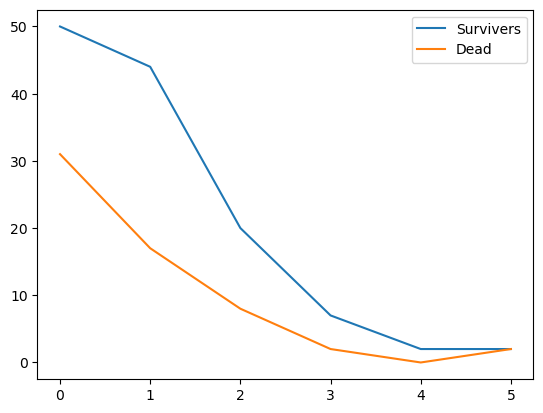

In [77]:
import matplotlib.pyplot as plt
    

plt.plot(relations,list(s.values()), label = 'Survivers')
plt.plot(relations,list(d.values()), label = 'Dead')


plt.legend()
plt.show()

13